### Importação das bibliotecas

Para utilizar as bibliotecas `pysus`, foi necessário instalá-la previamente.

Com o código abaixo, foram importandas as bibliotecas `pandas` e `pysus`:

In [2]:
from pysus.online_data import SINAN
from pysus.preprocessing.decoders import decodifica_idade_SINAN
import pandas as pd

### Carregando os dados

Baixei os dados disponíveis no banco de dados do SUS, referenta a doença leptospirose no ano de 2018 usando a biblioteca `pysus` usando o método `SINAN.download()`. Em seguida, converti os dados em um dataframe chamado **dataframe**.   
Modifiquei a coluna `DT_NOTIFIC` para o formato de data usando o método `pd.to_datetime()`. Por fim, transformei o dataframe em um arquivo CSV chamado 'Leptospirosis.csv' usando o método `to_csv()`.

In [3]:
path = SINAN.download('Leptospirose', 2018)
dataframe = pd.read_parquet(path)
dataframe['DT_NOTIFIC'] = pd.to_datetime(dataframe['DT_NOTIFIC'])
dataframe.to_csv('Leptospirose.csv', index=False)

### Manipulando os dados

Aqui, usando o método `pd.read_csv()`, li os dados do arquivo CSV 'Leptospirose.csv' gerado anteriormente em um novo dataframe chamado **dataframe_lepto_2018**. Em seguida, novamente converti a coluna `DT_NOTIFIC` para o formato de data, uma vez que estava dando erro sem esse comando.   
Então, defini a coluna `DT_NOTIFIC` como o índice do dataframe usando o método `set_index()`.   

O dataframe obtido pode ser visualizado abaixo do código.



In [4]:
dataframe_lepto_2018 = pd.read_csv('Leptospirose.csv')
dataframe_lepto_2018['DT_NOTIFIC'] = pd.to_datetime(dataframe_lepto_2018['DT_NOTIFIC'])
dataframe_lepto_2018.set_index('DT_NOTIFIC', inplace = True)
dataframe_lepto_2018

,TP_NOT,ID_AGRAVO,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,...,DT_RISCO3,DT_RISCO4,CO_MUN_R1,CO_MUN_R2,CO_MUN_R3,CO_MUN_R4,CO_UF_R1,CO_UF_R2,CO_UF_R3,CO_UF_R4
DT_NOTIFIC,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2,A279,201801,2018,35,355220,1353,2708779,20171222,201751,...,,,,,,,,,,
2018-01-01,2,A279,201801,2018,41,410690,1356,17396,20171230,201752,...,,,,,,,,,,
2018-01-01,2,A279,201801,2018,41,410040,1356,7463529,20171228,201752,...,,,,,,,,,,
2018-01-01,2,A279,201801,2018,43,431680,1609,9004688,20180101,201801,...,,,,,,,,,,
2018-01-01,2,A279,201801,2018,12,120040,1938,6439837,20171225,201752,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,2,A279,201901,2018,31,310620,1449,23140,20181229,201852,...,,,,,,,,,,
2018-12-31,2,A279,201901,2018,52,520870,1779,2506661,20181125,201848,...,,,,,,,,,,
2018-12-31,2,A279,201901,2018,12,120040,1938,6439837,20181222,201851,...,,,,,,,,,,


Para melhor visualização dos dados, mantive no dataframe apenas as variáveis que irei utilizar ao longo do trabalho.   
Modifiquei o próproprio dataframe, pois sei que não usarei mais as variáveis excluidas. Contudo, caso necessárias, ainda podem ser acessadas pelo `CSV`.   
 
Ficando o DataFrame resumido da seguinte forma:

In [5]:
dataframe_lepto_2018 = dataframe_lepto_2018[['ID_MUNICIP', 'SG_UF', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA']]
dataframe_lepto_2018

,ID_MUNICIP,SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA
DT_NOTIFIC,,,,,
2018-01-01,355220,35,4028,M,4
2018-01-01,410690,41,4012,F,2
2018-01-01,410040,41,4047,M,4
2018-01-01,431680,43,4032,M,2
2018-01-01,120040,12,4021,M,4
...,...,...,...,...,...
2018-12-31,310620,31,4004,F,4
2018-12-31,520870,52,4019,M,4
2018-12-31,120040,12,4028,F,4


## Respondendo as questões

Agora, com tudo preparado, podemos começar a responder as questões a respeito da doença escolhida.  

#### Questão 1

Inicialmente, verificaremos **quantos casos de leptospirose foram notificados no Brasil em `2018`**. Para isso, basta verificar a quantidade de linhas do dataframe, já que cada linha corresponde a um caso notificado.   

Para isso, basta o seguinte comando:

In [6]:
f'foram notificados {len(dataframe_lepto_2018.index)} casos de leptospirose no Brasil em 2018'

'foram notificados 16885 casos de leptospirose no Brasil em 2018'

#### Questão 2

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `por município`?**. Para isso, devemos agrupar os dados pela variável `ID_MUNICIP` e realizar a contagem.

A tabela com a contagem de casos por município pode ser visualizada abaixo.


In [7]:
agrupado_por_municipio = dataframe_lepto_2018.groupby('ID_MUNICIP').count().sort_values('SG_UF', ascending=False)['SG_UF']
agrupado_por_municipio

ID_MUNICIP
120040    1020
410690     861
355030     850
261160     462
150240     344
          ... 
353320       1
353390       1
353410       1
353460       1
353350       1
Name: SG_UF, Length: 1269, dtype: int64

#### Questão 3

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `por estado`?**. Para isso, da mesma forma que na questão anterior, devemos agrupar os dados pela variável `SG_UF` e realizar a contagem.

<Axes: title={'center': 'Casos de leptospirose em 2018 por estado'}, xlabel='SG_UF'>

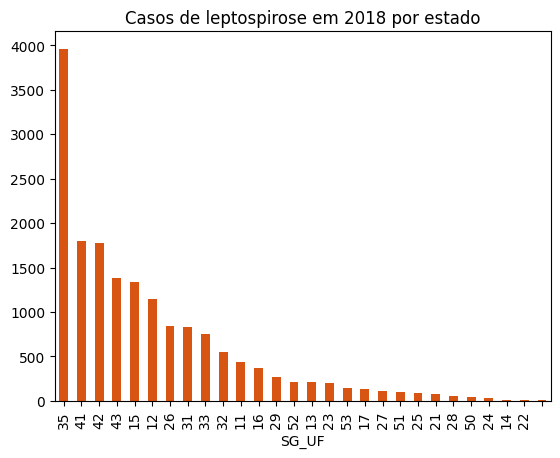

In [8]:
agrupado_por_estado = dataframe_lepto_2018.dropna(subset = ['SG_UF']).groupby('SG_UF').count().sort_values('ID_MUNICIP', ascending=False)['ID_MUNICIP']
agrupado_por_estado.plot.bar(color = '#d75413', title = 'Casos de leptospirose em 2018 por estado')

#### Questão 4

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `por mês`?**. Para isso, usamos o método `resample`, com o argumento 'M' para reorganizar os dados a partir dos meses e depois basta realizar a contagem. Vale ressaltar que o método resample funciona quando a série temporal está no índice.

<Axes: title={'center': 'Casos de leptospirose em 2018 por mês'}, xlabel='DT_NOTIFIC'>

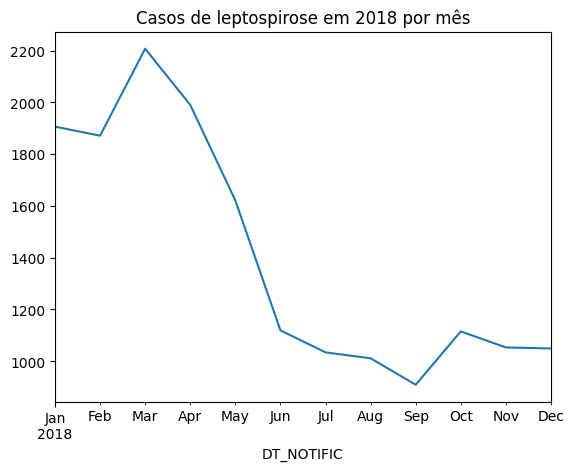

In [9]:
agrupado_por_mês = dataframe_lepto_2018.resample('M').count()['SG_UF']
agrupado_por_mês.plot.line(title = 'Casos de leptospirose em 2018 por mês')

#### Questão 5

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `por faixa etária`?**. Para isso, devemos decodificar a idade apresentada no bando de dados, usando para isso a função `decodifica_idade_SINAN`, importada do pysus. As idades decodificadas foram armazenadas em uma nova coluna chamada **idade** no dataframe. Então podemos agrupar os dados pela variável `idade` e realizar a contagem.   


In [10]:
pd.options.mode.chained_assignment = None
dataframe_lepto_2018['idade'] = decodifica_idade_SINAN(dataframe_lepto_2018.NU_IDADE_N)
dataframe_lepto_2018['idade'] = dataframe_lepto_2018['idade'].round(2)
agrupado_por_idade = dataframe_lepto_2018.groupby('idade').count().sort_values('SG_UF', ascending=False)
agrupado_por_idade.loc[:, 'SG_UF']

idade
34.00     353
33.00     351
37.00     343
31.00     340
38.00     334
         ... 
118.00      2
0.05        1
0.07        1
90.00       1
96.00       1
Name: SG_UF, Length: 114, dtype: int64

Contudo, para melhor visualização dos dados resolvi agrupar os dados por intervalos de 10 anos, aplicando um histograma.

array([[<Axes: title={'center': 'idade'}>]], dtype=object)

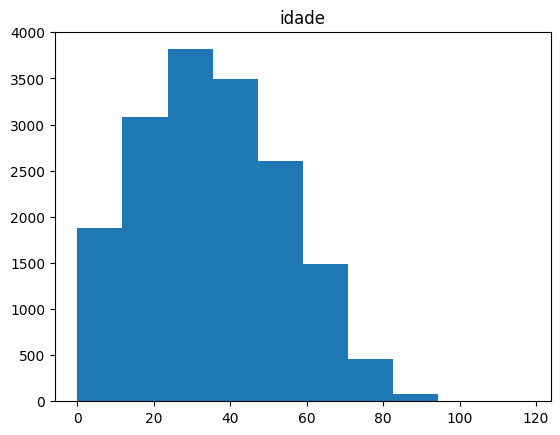

In [15]:
dataframe_lepto_2018.hist('idade', grid = False)

#### Questão 6

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `por sexo`?**. Para isso, devemos agrupar os dados pela variável `CS_SEXO` e realizar a contagem.

<Axes: title={'center': 'Número de casos de leptospirose por sexo'}, xlabel='CS_SEXO'>

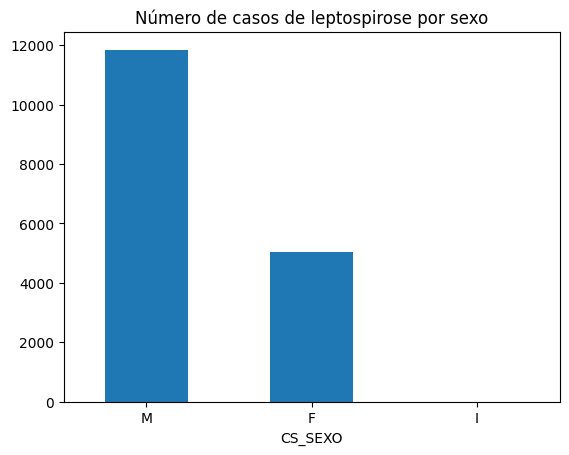

In [22]:
agrupado_por_sexo = dataframe_lepto_2018.groupby('CS_SEXO').count().sort_values('SG_UF', ascending=False)['SG_UF']
agrupado_por_sexo.plot.bar(title = 'Número de casos de leptospirose por sexo',rot = 0)

#### Questão 7

Verificaremos **Quantos casos de leptospirose foram notificados no Brasil em 2018, `raça/cor`?**. Para isso, devemos agrupar os dados pela variável `ID_MUNICIP` e realizar a contagem.

In [ ]:
agrupado_por_raca = dataframe_lepto_2018.groupby('CS_RACA').count().sort_values('SG_UF', ascending=False)
# print(agrupado_por_raca['SG_UF'])